In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#Simplified 2D example (real embedding having hunderds of dimensions)
word_embeddings = {
    "cat":[0.8, 0.6], 
    "kitten":[0.75,0.65],
    "dog":[0.7,0.3], 
    "puppy":[0.65,0.35],
    "car":[-0.5,0.2],
    "truck":[-0.45,0.15]
}


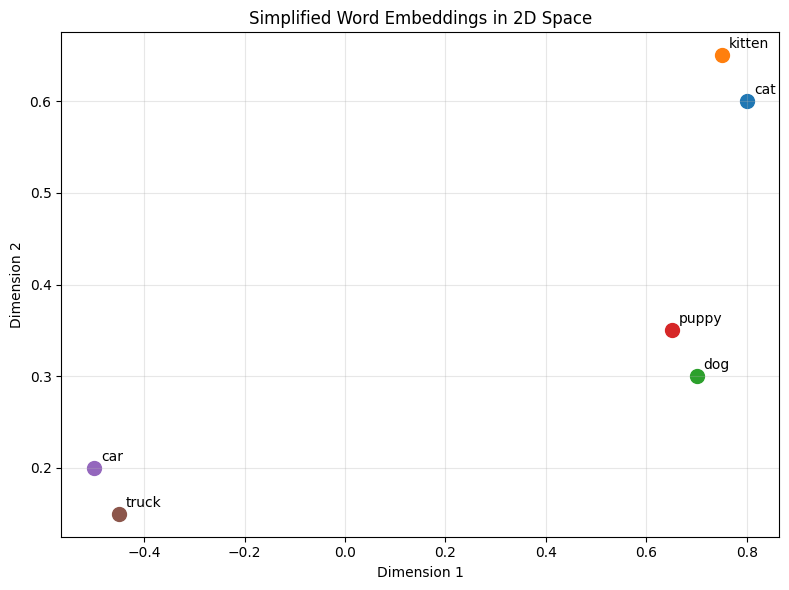

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity


In [11]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measure the angle between two vectors.
    - Result close to 1: very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a*norm_b)

In [27]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity = cosine_similarity(cat_vector, kitten_vector)
cat_car_similarity = cosine_similarity(cat_vector, car_vector)
print("cat_kitten_similarity: ",cat_kitten_similarity)
print("cat_car_similarity: ",cat_car_similarity)

cat_kitten_similarity:  0.9966186334192181
cat_car_similarity:  -0.43718588548916804


### Creating first Embeddings

In [1]:
#Hugging Face and OpenAI Models
from langchain_huggingface import HuggingFaceEmbeddings

###Initialize a simple embedding model(no API key needed!)

embeddings = HuggingFaceEmbeddings(
    model_name = "sentence-transformers/all-MiniLM-L6-v2"
)
embeddings


e:\workspace\ultimate_rag_bootcamp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\workspace\ultimate_rag_bootcamp\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. I

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [2]:
text = "Hello, I am learning about embeddings"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding Length : {len(embedding)}")
print(embedding)

Text: Hello, I am learning about embeddings
Embedding Length : 384
[-0.016661586239933968, -0.09771724045276642, 0.0019201157847419381, -0.0016134614124894142, 0.01404662150889635, 0.0608392208814621, 0.012283600866794586, 0.015745429322123528, 0.04093799367547035, -0.030124517157673836, 0.026265155524015427, 0.06559298187494278, 0.045701660215854645, 0.008897008374333382, -0.046206019818782806, 0.019462548196315765, 0.04677305743098259, 0.07357386499643326, -0.07927089184522629, -0.006600862834602594, -0.033839669078588486, -0.04663918539881706, 0.010644794441759586, -0.09673542529344559, 0.024105310440063477, -0.02533300779759884, -0.02141120471060276, 0.05911489576101303, 0.10023822635412216, -0.06024160981178284, 0.03970736637711525, -0.03374626860022545, -0.019574351608753204, 0.0662289410829544, -0.061764683574438095, 0.11689270287752151, 0.039554204791784286, -0.003068638266995549, -0.08189614862203598, -0.003654124680906534, 0.028080904856324196, 0.02515636943280697, -0.0270486

In [4]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentences = embeddings.embed_documents(sentences)


print(embedding_sentences[0])
print(embedding_sentences[1])

[0.1304018646478653, -0.011870092712342739, -0.028117021545767784, 0.05123866721987724, -0.05597447603940964, 0.030191542580723763, 0.0301612988114357, 0.024698395282030106, -0.018370550125837326, 0.05876676365733147, -0.02495318278670311, 0.0601542592048645, 0.039831746369600296, 0.033230509608983994, -0.061311349272727966, -0.049373116344213486, -0.05486350879073143, -0.04007606953382492, 0.056429121643304825, 0.039156582206487656, -0.03473709151148796, -0.013247676193714142, 0.031966209411621094, -0.06349921226501465, -0.06017857789993286, 0.07823451608419418, -0.02830391190946102, -0.04744282737374306, 0.04035929590463638, -0.006630908697843552, -0.0667409598827362, -0.004191359970718622, -0.025311656296253204, 0.053341712802648544, 0.01742810197174549, -0.09792360663414001, 0.006061285734176636, -0.06524165719747543, 0.045572616159915924, 0.023641815409064293, 0.0765848457813263, -0.010264340788125992, -0.004076807294040918, -0.06232285499572754, 0.033705271780490875, 0.0186611302